In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matlab
import matlab.engine
from oset.generic.lp_filter.lp_filter_zero_phase import lp_filter_zero_phase
from oset.ecg.peak_detection.peak_det_likelihood import peak_det_likelihood

In [2]:
mat = scipy.io.loadmat("../../../datasets/sample-data/SampleECGData.mat")["ECGdata"][4]
f = 1
fs = 1000
fc = 0.5

mat = mat[0: 60 * fs]
mat = np.array([mat])
t = np.arange(len(mat[0])) / fs

mat = mat - lp_filter_zero_phase(mat, fc / fs)
peaks, peak_indexes, peak_indexes_consensus, qrs_likelihood = peak_det_likelihood(mat, fs)

In [3]:
eng = matlab.engine.start_matlab()
x = matlab.double(mat.tolist())
params = {}
params['filter_type'] = 'BANDPASS_FILTER'
eng.addpath("../../../matlab/tools/ecg")
eng.addpath("../../../matlab/tools/generic")
mat_results = eng.peak_det_likelihood(x, float(fs), params, nargout=2)

<Figure size 640x480 with 0 Axes>

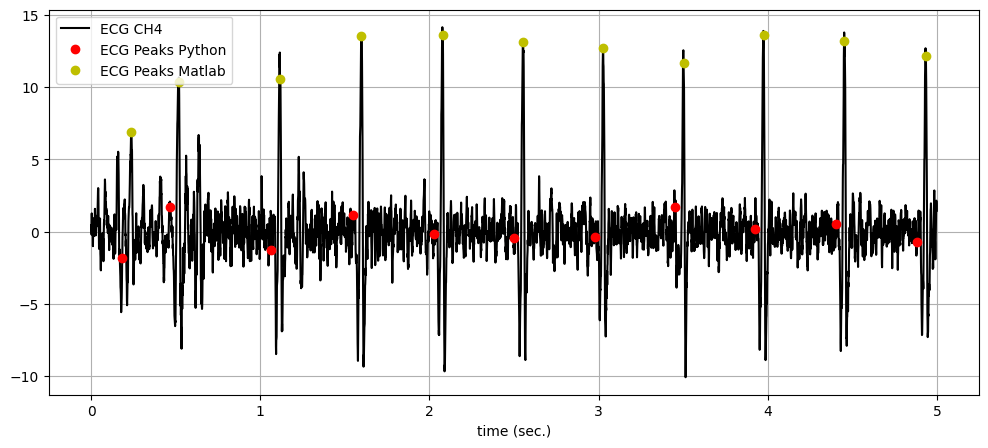

In [4]:
mat = mat[:, 0: 5 * fs]
t = t[0: 5 * fs]
# peak_indexes += 1
peak_indexes = peak_indexes[0:11]
mat_results = np.array(mat_results[1][0]).astype(int)[0][0:11]
plt.figure()
plt.figure(figsize=(12, 5))
plt.plot(t, mat[0], "k", label="ECG CH4")

plt.plot(t[peak_indexes], mat[0][peak_indexes], "ro", label="ECG Peaks Python")
plt.plot(t[mat_results], mat[0][mat_results], "yo", label="ECG Peaks Matlab")
plt.xlabel("time (sec.)")
plt.legend()
plt.grid()
plt.show()

In [5]:
print(mat_results)
print(peak_indexes)

[ 237  519 1116 1597 2077 2553 3027 3502 3975 4453 4934]
[ 183  466 1064 1548 2027 2502 2978 3453 3924 4403 4884]
